# Data cleaning and merging, linear regression (1st and 2nd degree polynomial), log-scales, likelihood tests

In [1]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
s = json.load(open(os.getenv('PUI2015')+'/PUI2015_MMajumdar/pui.json'))
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\ManushiM\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#Data about Energy Consumption
nrg = gp.GeoDataFrame.from_csv(os.getenv('PUI2015')+"/PUI2015_MMajumdar/HW5/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [3]:
#PLUTO Data
bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003EBF6A20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000357140B8>]], dtype=object)

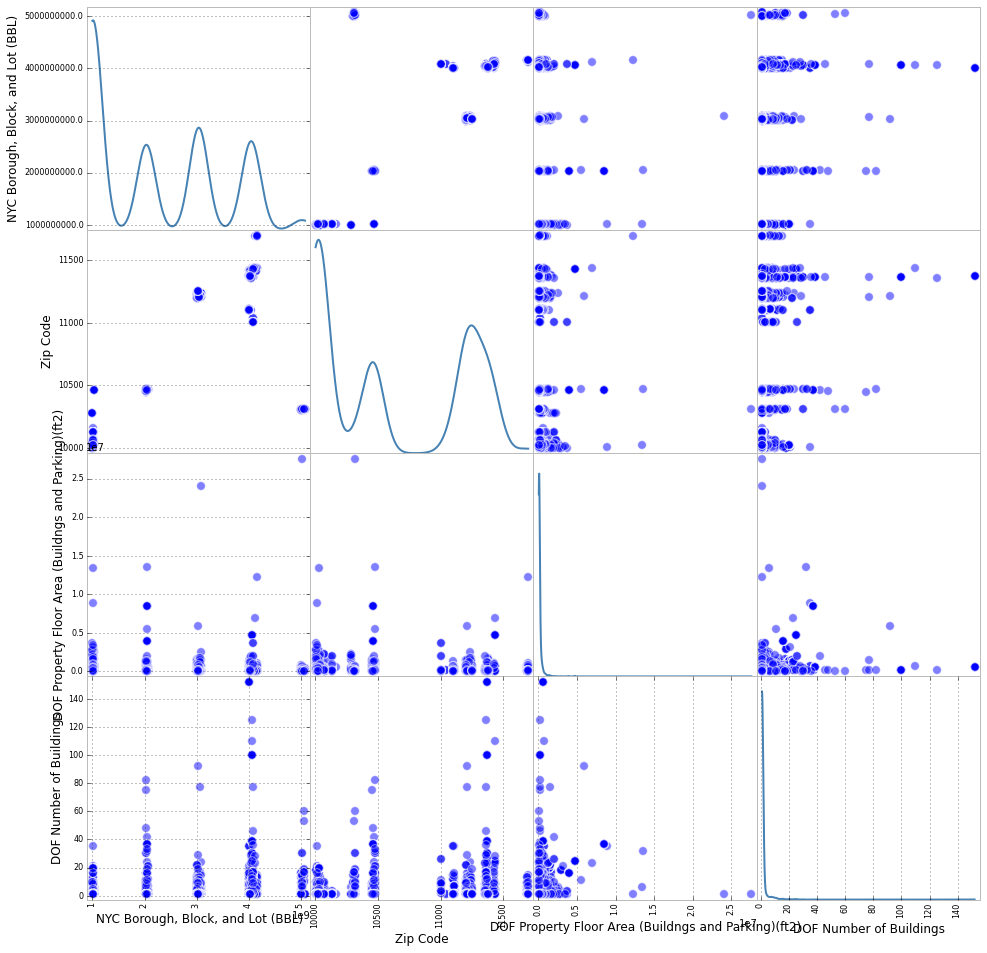

In [4]:
#Plotting the scatter matrix
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

In [5]:

def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [6]:
nrg['energy'] = nrg['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nrg['area'] = nrg['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)

In [7]:
##check that your conversion worked: e.g.
print nrg['energy'].astype(float)
print nrg['area'].astype(float)
#[...] check all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want
print bsize.BBL.astype(float)
#notice i can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!

Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
2301        88.2
15059       15.7
674          NaN
2537        85.7
2841       195.7
2945        79.1
15120      144.1
3053       200.9
4233       104.6
4777        86.7
4912       102.1
5210        21.2
5295        78.3
1575         NaN
15025       55.2
4208        83.2
4799       145.1
1568        59.4
5427        88.7
5476       100.8
          ...   
14559        NaN
14560        NaN
14748        NaN
14753        NaN
13582        NaN
13947        NaN
14777        NaN
14779        NaN
14409        NaN
13262        NaN
13261        NaN
12523        NaN
12529        NaN
12536        NaN
13929        NaN
13944        NaN
13945        NaN
13821        NaN
13829        NaN
13837        NaN
13838        NaN
13847        NaN
14352        NaN
12976        NaN
12978        NaN
12984        NaN
12987        NaN


#TO MERGE THE DATASET WE NEED A COMMON COLUMN
here is where you want to merge the datasets. You need a common column: the building id BBL
However the name of this variable (column) in the Energy dataset is     'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!) 

In [8]:
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)']

#merge the table file with the shape file
BBLMerge = pd.merge(nrg, bsize, on='BBL')

C:\Users\ManushiM\Anaconda\lib\site-packages\pandas\core\index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
C:\Users\ManushiM\Anaconda\lib\site-packages\pandas\core\index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


In [9]:
BBLMerge['Building Energy Consumption'] = BBLMerge['energy']*BBLMerge['area']

C:\Users\ManushiM\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


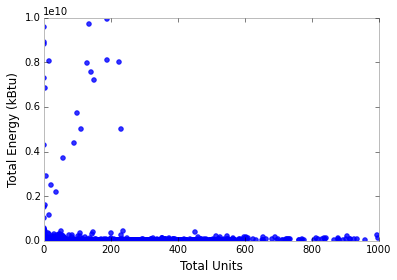

In [10]:
BBLMerge.plot(kind='scatter', x='UnitsTotal', y='Building Energy Consumption', color='b', alpha=0.8)
pl.xlim([1, 1000])
pl.ylim([1000, 1e10])
pl.xlabel('Total Units')
pl.ylabel('Total Energy (kBtu)')
pl.grid()
pl.legend()

when the points in a plot all look scrunched against the axis try a log plot! in pandas you enable that with the keyword 'loglog' :
bblnrgdata.plot(..... loglog=True)

NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data i had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array:
something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

also i removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however  they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.


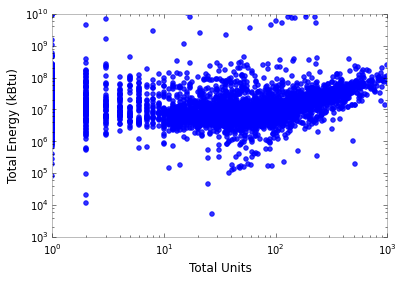

In [11]:
#Plotting log values
BBLMerge.plot(kind='scatter', x='UnitsTotal', y='Building Energy Consumption', color='b', alpha=0.8, loglog=True)
pl.xlim([1, 1000])
pl.ylim([1000, 1e10])
pl.xlabel('Total Units')
pl.ylabel('Total Energy (kBtu)')
pl.grid()
pl.legend()

In [12]:
# Cutting the dataset

BBLCut = BBLMerge[(BBLMerge['Building Energy Consumption']>=1000)&(BBLMerge['Building Energy Consumption']<1e+10) & (BBLMerge['UnitsTotal']>=1)&(BBLMerge['UnitsTotal']<1000)]

BBLCut

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough_x,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry,Building Energy Consumption
0,1005050001,NaN,1005050001,1007817,150,VARICK STREET,Manhattan,10013,Filed,82.1,...,1926,None,10013,M1-6,None,None,None,12a,"POLYGON ((982849.6037999988 203886.2427999973,...",1.932388e+07
1,1021420100,NaN,1021420100,1063495,4079,BROADWAY,Manhattan,10032,Filed,137.69999999999999,...,1924,None,10032,R8,None,None,None,3b,"POLYGON ((1001098.760600001 246912.0266000032,...",8.923786e+06
2,1021750080,NaN,1021750080,1064235,60,SHERMAN AVENUE,Manhattan,10040,Filed,103.2,...,1920,None,10040,R7-2,None,None,None,3a,"POLYGON ((1004289.818000004 253753.9872000068,...",6.484985e+06
3,1003360005,NaN,1003360005,1088884,16,BIALYSTOKER PLACE,Manhattan,10002,Filed,74,...,1982,Y,10002,R8,None,None,None,12c,"POLYGON ((988978.3273999989 200091.3113999963,...",7.252000e+06
4,1008070028,NaN,1-00807-0028,1015181,119,WEST 31 STREET,Manhattan,10001,Filed,130,...,1912,None,10001,C6-4.5,None,None,None,8d,"POLYGON ((987142.3643999994 212082.1648000032,...",2.657421e+07
5,1008580014,NaN,1-00858-0014,1016899,80,MADISON AVENUE,Manhattan,10016,Filed,138.30000000000001,...,1923,None,10016,C5-2,None,None,None,8d,"POLYGON ((988236.059799999 210446.8110000044, ...",8.313213e+06
7,1011390001,NaN,1-01139-0001,1028849,145,WEST 67 STREET,Manhattan,10023,Filed,88.2,...,1986,None,10023,C4-7,None,None,None,8c,"POLYGON ((988979.4684000015 221890.7784000039,...",4.507029e+07
8,1012090148,NaN,1-01209-00148,1031751,NaN,NaN,Manhattan,NaN,Not on Covered Buildings List,15.7,...,1900,None,10025,R9,None,None,None,5d,"POLYGON ((993619.4018000066 227878.1987999976,...",8.861394e+05
10,1012120110,NaN,1012120110,1032045,155,WEST 81 STREET,Manhattan,10024,Filed,85.7,...,1951,None,10024,R8B,None,None,None,5d,"POLYGON ((990888.7872000039 225024.3105999976,...",6.721880e+06
11,1012747502,NaN,1-01274-7502,1035250,57,WEST 58 STREET,Manhattan,10019,Filed,195.7,...,1901,None,10019,C5-1,None,None,None,8c,"POLYGON ((990848.2504000068 217934.0659999996,...",1.571334e+07


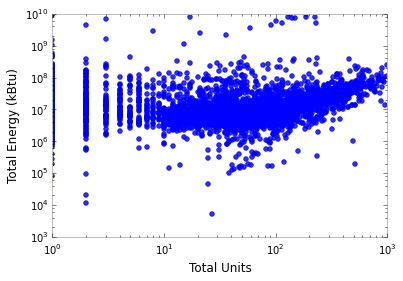

In [13]:
BBLCut.plot(kind='scatter', x='UnitsTotal', y='Building Energy Consumption', color='b', alpha=0.8, loglog=True)
#plt.scatter(x=np.log10(BBLmerge['UnitsTotal']),y=np.log10(BBLmerge['Building Energy Consumption']),linestyle='o', color='b', alpha=0.8)
pl.xlim([1, 1000])
pl.ylim([1000, 1e10])
pl.xlabel('Total Units')
pl.ylabel('Total Energy (kBtu)')
pl.grid()
pl.legend()

In [14]:
import statsmodels.api as smf

y = (BBLCut['Building Energy Consumption'])
x = (BBLCut['UnitsTotal'])
#Fitting a line through the data
x1 = smf.add_constant(np.log10(x))
y1 = np.log10(y) 

model1 = smf.OLS(y1, x1, missing='drop').fit()
print model1.summary()

                                 OLS Regression Results                                
Dep. Variable:     Building Energy Consumption   R-squared:                       0.011
Model:                                     OLS   Adj. R-squared:                  0.011
Method:                          Least Squares   F-statistic:                     56.32
Date:                         Tue, 20 Oct 2015   Prob (F-statistic):           7.26e-14
Time:                                 00:17:49   Log-Likelihood:                -3378.5
No. Observations:                         4956   AIC:                             6761.
Df Residuals:                             4954   BIC:                             6774.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------

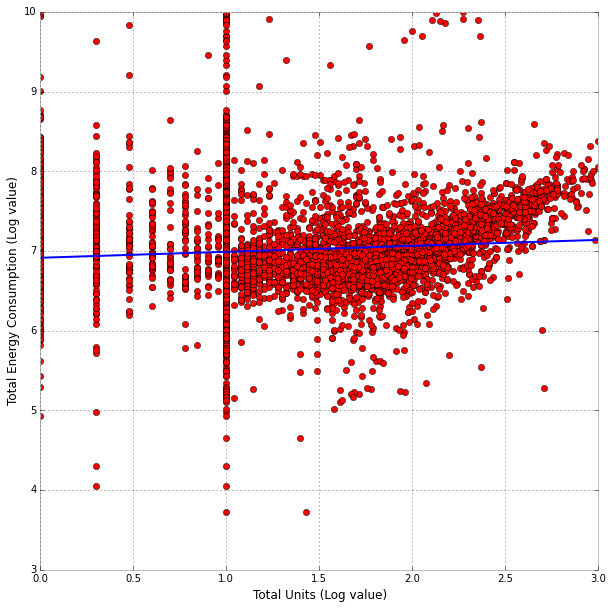

In [15]:
#Plotting Units v/s Energy Consumption
figure1 = figure(figsize = (10,10))
xPlot1 = np.arange(0, 4, 1)
yPlot1 = (model1.params)[1]*xPlot1 + (model1.params)[0]
ax = figure1.add_subplot(111)
ax.plot(x1, y1, 'ro')
ax.plot(xPlot1, yPlot1, 'blue')
plt.xlabel('Total Units (Log value)')
plt.ylabel('Total Energy Consumption (Log value)')

In [16]:
x2 = smf.add_constant(np.log10(y))
y2 = np.log10(x)

model2 = smf.OLS(y2, x2, mising='drop').fit()
print model2.summary()

x2 = (np.log10(y))
y2 = smf.add_constant(np.log10(x))

                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     56.32
Date:                Tue, 20 Oct 2015   Prob (F-statistic):           7.26e-14
Time:                        00:17:57   Log-Likelihood:                -5105.9
No. Observations:                4956   AIC:                         1.022e+04
Df Residuals:                    4954   BIC:                         1.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
const             

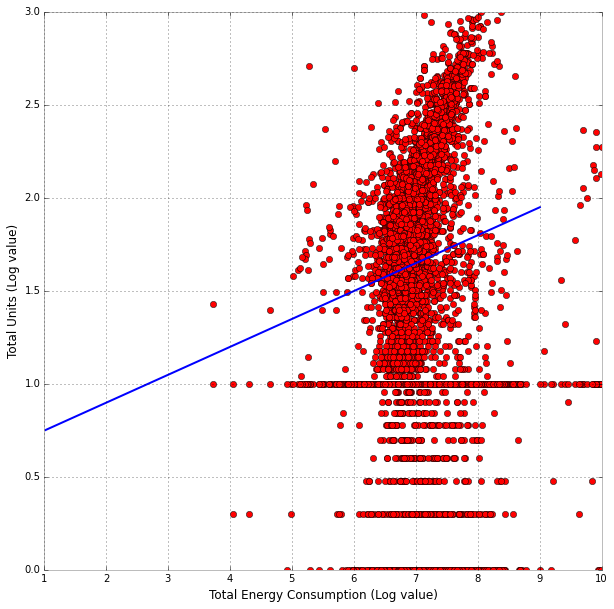

In [17]:
#Plotting Energy Consumption v/s Units
figure2 = figure(figsize = (10,10))
xPlot2 = np.arange(1, 10, 1)
yPlot2 = (model2.params)[1]*xPlot2 + (model2.params)[0]
ax = figure2.add_subplot(111)
ax.plot(x2, y2, 'ro')
ax.plot(xPlot2, yPlot2, 'blue')

plt.xlabel('Total Energy Consumption (Log value)')
plt.ylabel('Total Units (Log value)')


### The R-squared value for both the above models is significant. The "Energy vs. Units" plot observes more of a linear trend in comparison to the other. Hence the model that predicts energy as a function of number of units makes more sense. Likelihood ratio test is not applicable here as both are trying to test different hypotheses.

### Second Degree Curve

In [18]:
#Second degree curve

curve = np.polyfit(x, y, 2)
x3 = np.log10(x)
y3 = np.log10(y)
model3 = smf.OLS(y3, x3, mising='drop').fit()
print model3.summary()

model4 = np.polyfit(x3, y3, 2)

                                 OLS Regression Results                                
Dep. Variable:     Building Energy Consumption   R-squared:                       0.856
Model:                                     OLS   Adj. R-squared:                  0.856
Method:                          Least Squares   F-statistic:                 2.944e+04
Date:                         Tue, 20 Oct 2015   Prob (F-statistic):               0.00
Time:                                 00:18:09   Log-Likelihood:                -11913.
No. Observations:                         4956   AIC:                         2.383e+04
Df Residuals:                             4955   BIC:                         2.384e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------

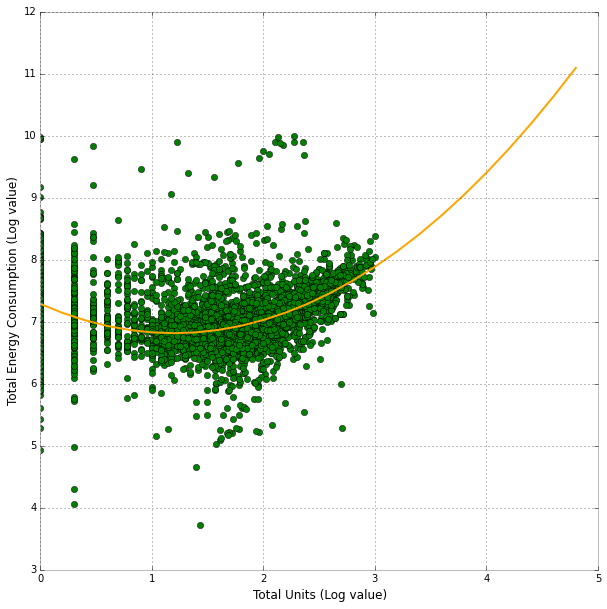

In [19]:
#Fitting the second degree curve
figure3 = figure(figsize = (10,10))
ax = figure3.add_subplot(111)
ax.plot (x3, y3, 'go')
xPlot3 = np.arange(0, 5, .2)
yPlot3 = model4[0]*xPlot3**2 + model4[1]*xPlot3 + model4[2]
ax.plot (xPlot3, yPlot3, 'orange')
plt.xlabel('Total Units (Log value)')
plt.ylabel('Total Energy Consumption (Log value)')